In [5]:
!pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 8.7 MB/s eta 0:00:00


In [29]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
import numpy as np

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn import svm

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

In [9]:
df= pd.read_csv("heart.csv")

In [10]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [24]:
from sklearn.model_selection import train_test_split

X= df.drop(columns='target')
y= df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [38]:
ab= AdaBoostClassifier()

ab.fit(X_train,y_train)


AdaBoostClassifier()

In [39]:
ab.score(X_test,y_test)

0.8536585365853658

In [25]:
ab = AdaBoostClassifier()
xgb= XGBClassifier()
rf= RandomForestClassifier()
reg= LogisticRegression()
model_list = [ab,xgb,rf,reg]

for i in range(len(model_list)):
    
    print(f"{model_list[i].get_params()}"+"\n")
    


{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'valida

# HyperParameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

ab_grid={
    'learning_rate':np.arange(0.25,0.5,1),
    'n_estimators':np.arange(10,50,100),
}

xgb_grid={
    
    'early_stopping_rounds':['None',5,10],
    'enable_categorical':[True,False],
    'n_estimators':np.arange(10,50,60),
}

rf_grid = {
    "n_estimators": np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
            "min_samples_leaf": np.arange(1,20,2) 
}


gs_ab = GridSearchCV(AdaBoostClassifier(),
                    param_grid= ab_grid,
                    cv=7,
                    verbose=True
                    )

gs_ab.fit(X_train,y_train)

Fitting 7 folds for each of 1 candidates, totalling 7 fits


GridSearchCV(cv=7, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': array([0.25]),
                         'n_estimators': array([10])},
             verbose=True)

In [37]:
gs_ab.score(X_test,y_test)

0.8536585365853658

In [40]:
gs_preds = gs_ab.predict(X_test)
gs_preds

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0], dtype=int64)

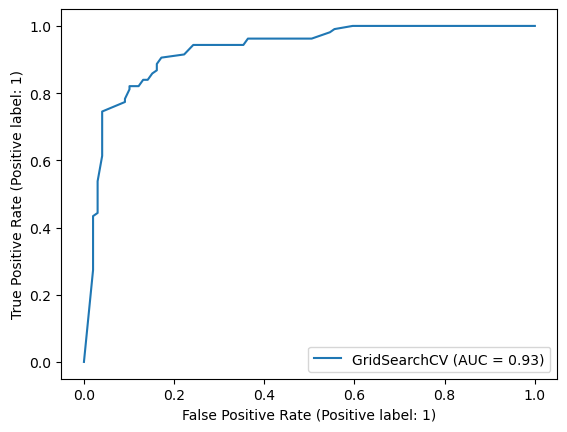

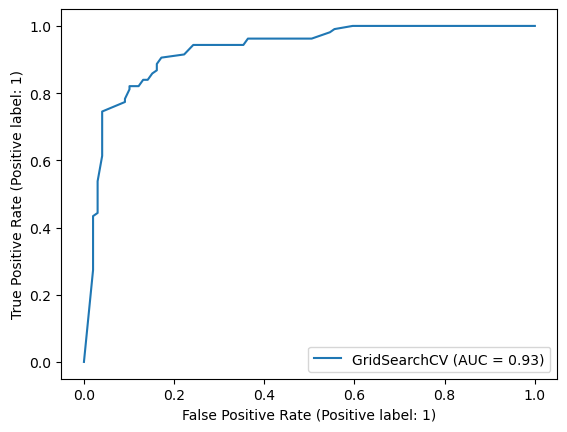

In [70]:
from sklearn.metrics import RocCurveDisplay

disp= RocCurveDisplay.from_estimator(gs_ab,X_test,y_test)
disp.plot()

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        99
           1       0.86      0.86      0.86       106

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



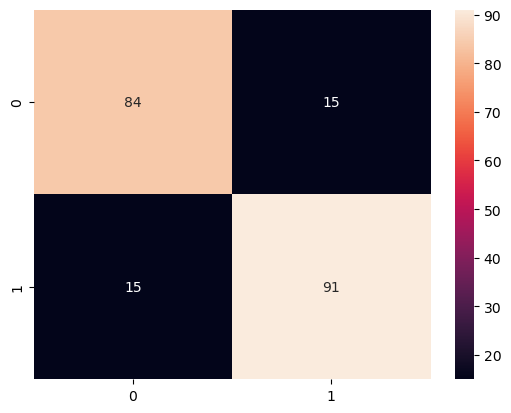

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

sns.heatmap(confusion_matrix(gs_preds,y_test),annot=True)
print(classification_report(gs_preds,y_test))

In [43]:
gs_ab.best_params_

{'learning_rate': 0.25, 'n_estimators': 10}

In [46]:
ab.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

# Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score


clf= AdaBoostClassifier(learning_rate=0.25, n_estimators=10)

cv_acc= cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc= np.mean(cv_acc)

cv_acc

0.8487804878048781

In [49]:
cv_rec= cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_rec= np.mean(cv_rec)

cv_rec

0.8784725965858042

In [50]:
cv_prec = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_orec= np.mean(cv_prec)

cv_orec

0.8373631676565081

<Axes: title={'center': 'Cross Validation Scores'}>

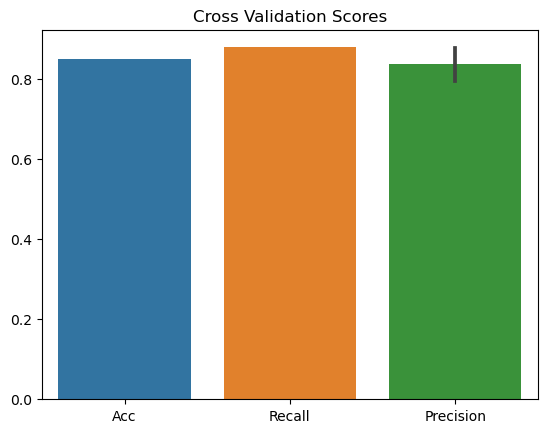

In [71]:
metricsplot= pd.DataFrame({
    "Acc": cv_acc,
    "Recall":cv_rec,
    "Precision":cv_prec,
})
plt.title("Cross Validation Scores")
sns.barplot(metricsplot)

# Feature Importance

In [54]:
feat_importance= ab.feature_importances_
print(feat_importance)



[0.16 0.04 0.04 0.1  0.2  0.   0.   0.12 0.02 0.16 0.04 0.08 0.04]


In [57]:
feat_dic= dict(zip(df.columns,list(feat_importance)))
feat_dic

{'age': 0.16,
 'sex': 0.04,
 'cp': 0.04,
 'trestbps': 0.1,
 'chol': 0.2,
 'fbs': 0.0,
 'restecg': 0.0,
 'thalach': 0.12,
 'exang': 0.02,
 'oldpeak': 0.16,
 'slope': 0.04,
 'ca': 0.08,
 'thal': 0.04}

Text(0.5, 1.0, 'Feature Importance')

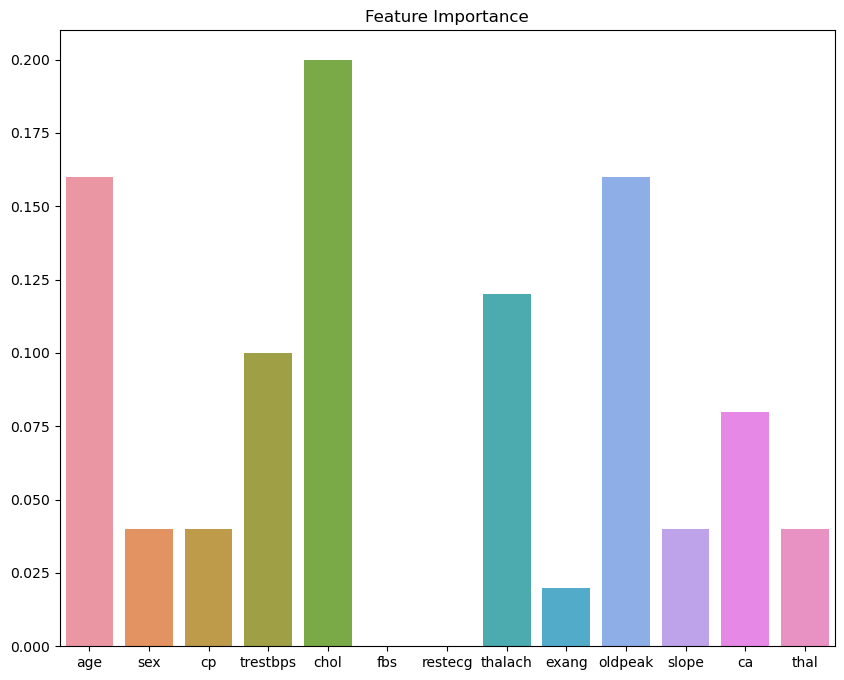

In [62]:
feature_plot= pd.DataFrame(feat_dic,index=[0])
plt.figure(figsize=(10,8))
sns.barplot(feature_plot)
plt.title("Feature Importance")